In [55]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Read in the data set

df = pd.read_csv('Mortality Dataset.csv')

# View the first few rows of the dataset
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Getting the shape of the dataframe
print(df.shape)

(299, 13)


In [5]:
# Check for missing values
print(df.isnull().sum())
# no missing values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [51]:
# summary
description = df.describe()
description

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
# examine feature multi-collinearity
X = df.drop(['DEATH_EVENT', 'time'], axis=1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                     feature        VIF
0                        age  28.138107
1                    anaemia   1.873138
2   creatinine_phosphokinase   1.441426
3                   diabetes   1.789233
4          ejection_fraction  12.060329
5        high_blood_pressure   1.585411
6                  platelets   8.641628
7           serum_creatinine   2.889324
8               serum_sodium  49.436004
9                        sex   3.795152
10                   smoking   1.889761


In [47]:
# examine feature multi-collinearity
X = df[['age','sex','ejection_fraction', 'anaemia', 'high_blood_pressure', 
        'creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                    feature        VIF
0                       age  27.712959
1         ejection_fraction  11.754259
2                   anaemia   1.843000
3       high_blood_pressure   1.563684
4  creatinine_phosphokinase   1.431491
5          serum_creatinine   2.885126
6              serum_sodium  37.195608


In [50]:
# Check number of events vs non-events
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [52]:
# Drop the 'count' row and categorical variables for better visualization
description = description.drop('count')
description = description.drop(['anaemia','sex','smoking','diabetes','high_blood_pressure','DEATH_EVENT'], axis=1)

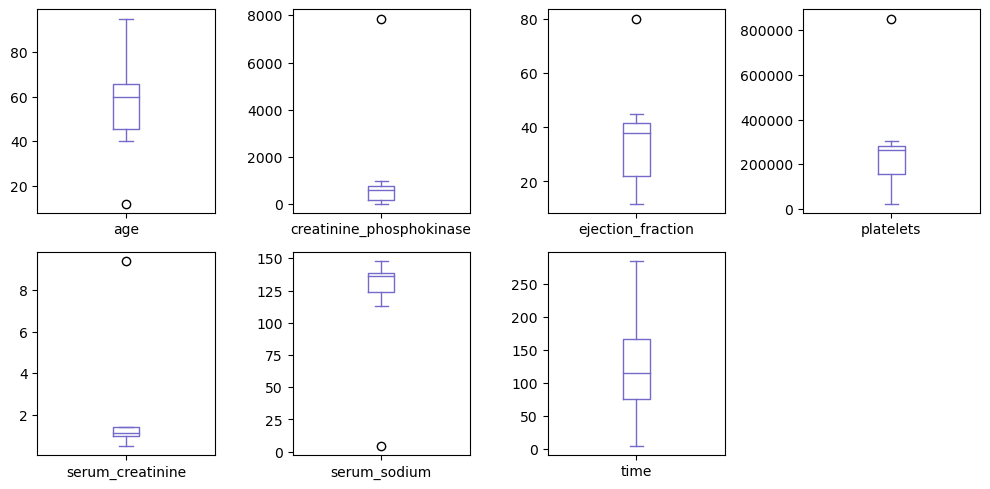

In [53]:
# Visual representation of data.describe()
description.plot(kind='box', subplots=True, layout=(2, 4), figsize=(10, 5), color='#7569c9')
plt.tight_layout()
plt.show()

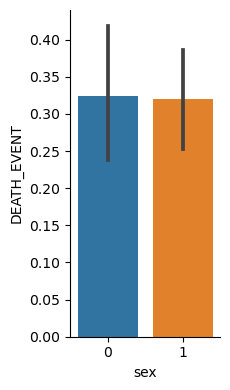

In [59]:
# Look at the categorical variables and outcome
sns.catplot(data=df, x="sex", y="DEATH_EVENT", kind="bar", height=4, aspect=.6)

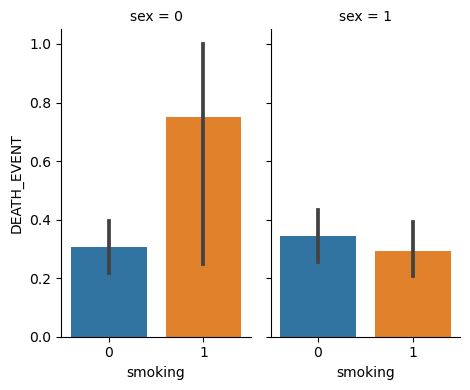

In [60]:
sns.catplot(data=df, x="smoking", y="DEATH_EVENT", col="sex", kind="bar", height=4, aspect=.6)

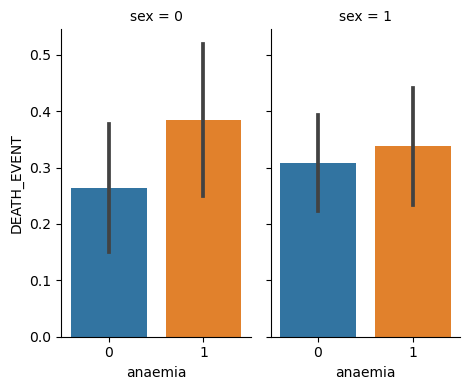

In [62]:
sns.catplot(data=df, x="anaemia", y="DEATH_EVENT", col="sex", kind="bar", height=4, aspect=.6)

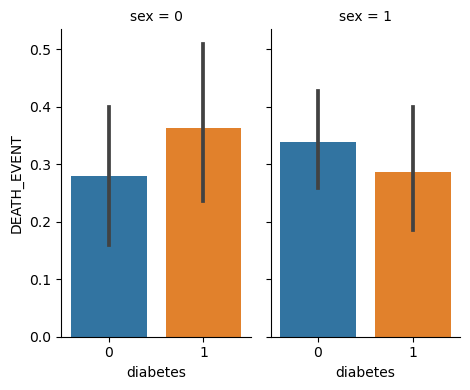

In [63]:
sns.catplot(data=df, x="diabetes", y="DEATH_EVENT", col="sex", kind="bar", height=4, aspect=.6)

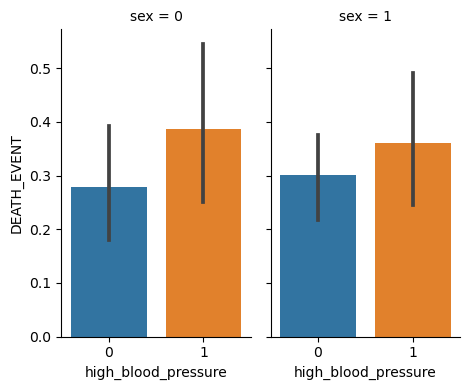

In [80]:
sns.catplot(data=df, x="high_blood_pressure", y="DEATH_EVENT", col="sex", kind="bar", height=4, aspect=.6)

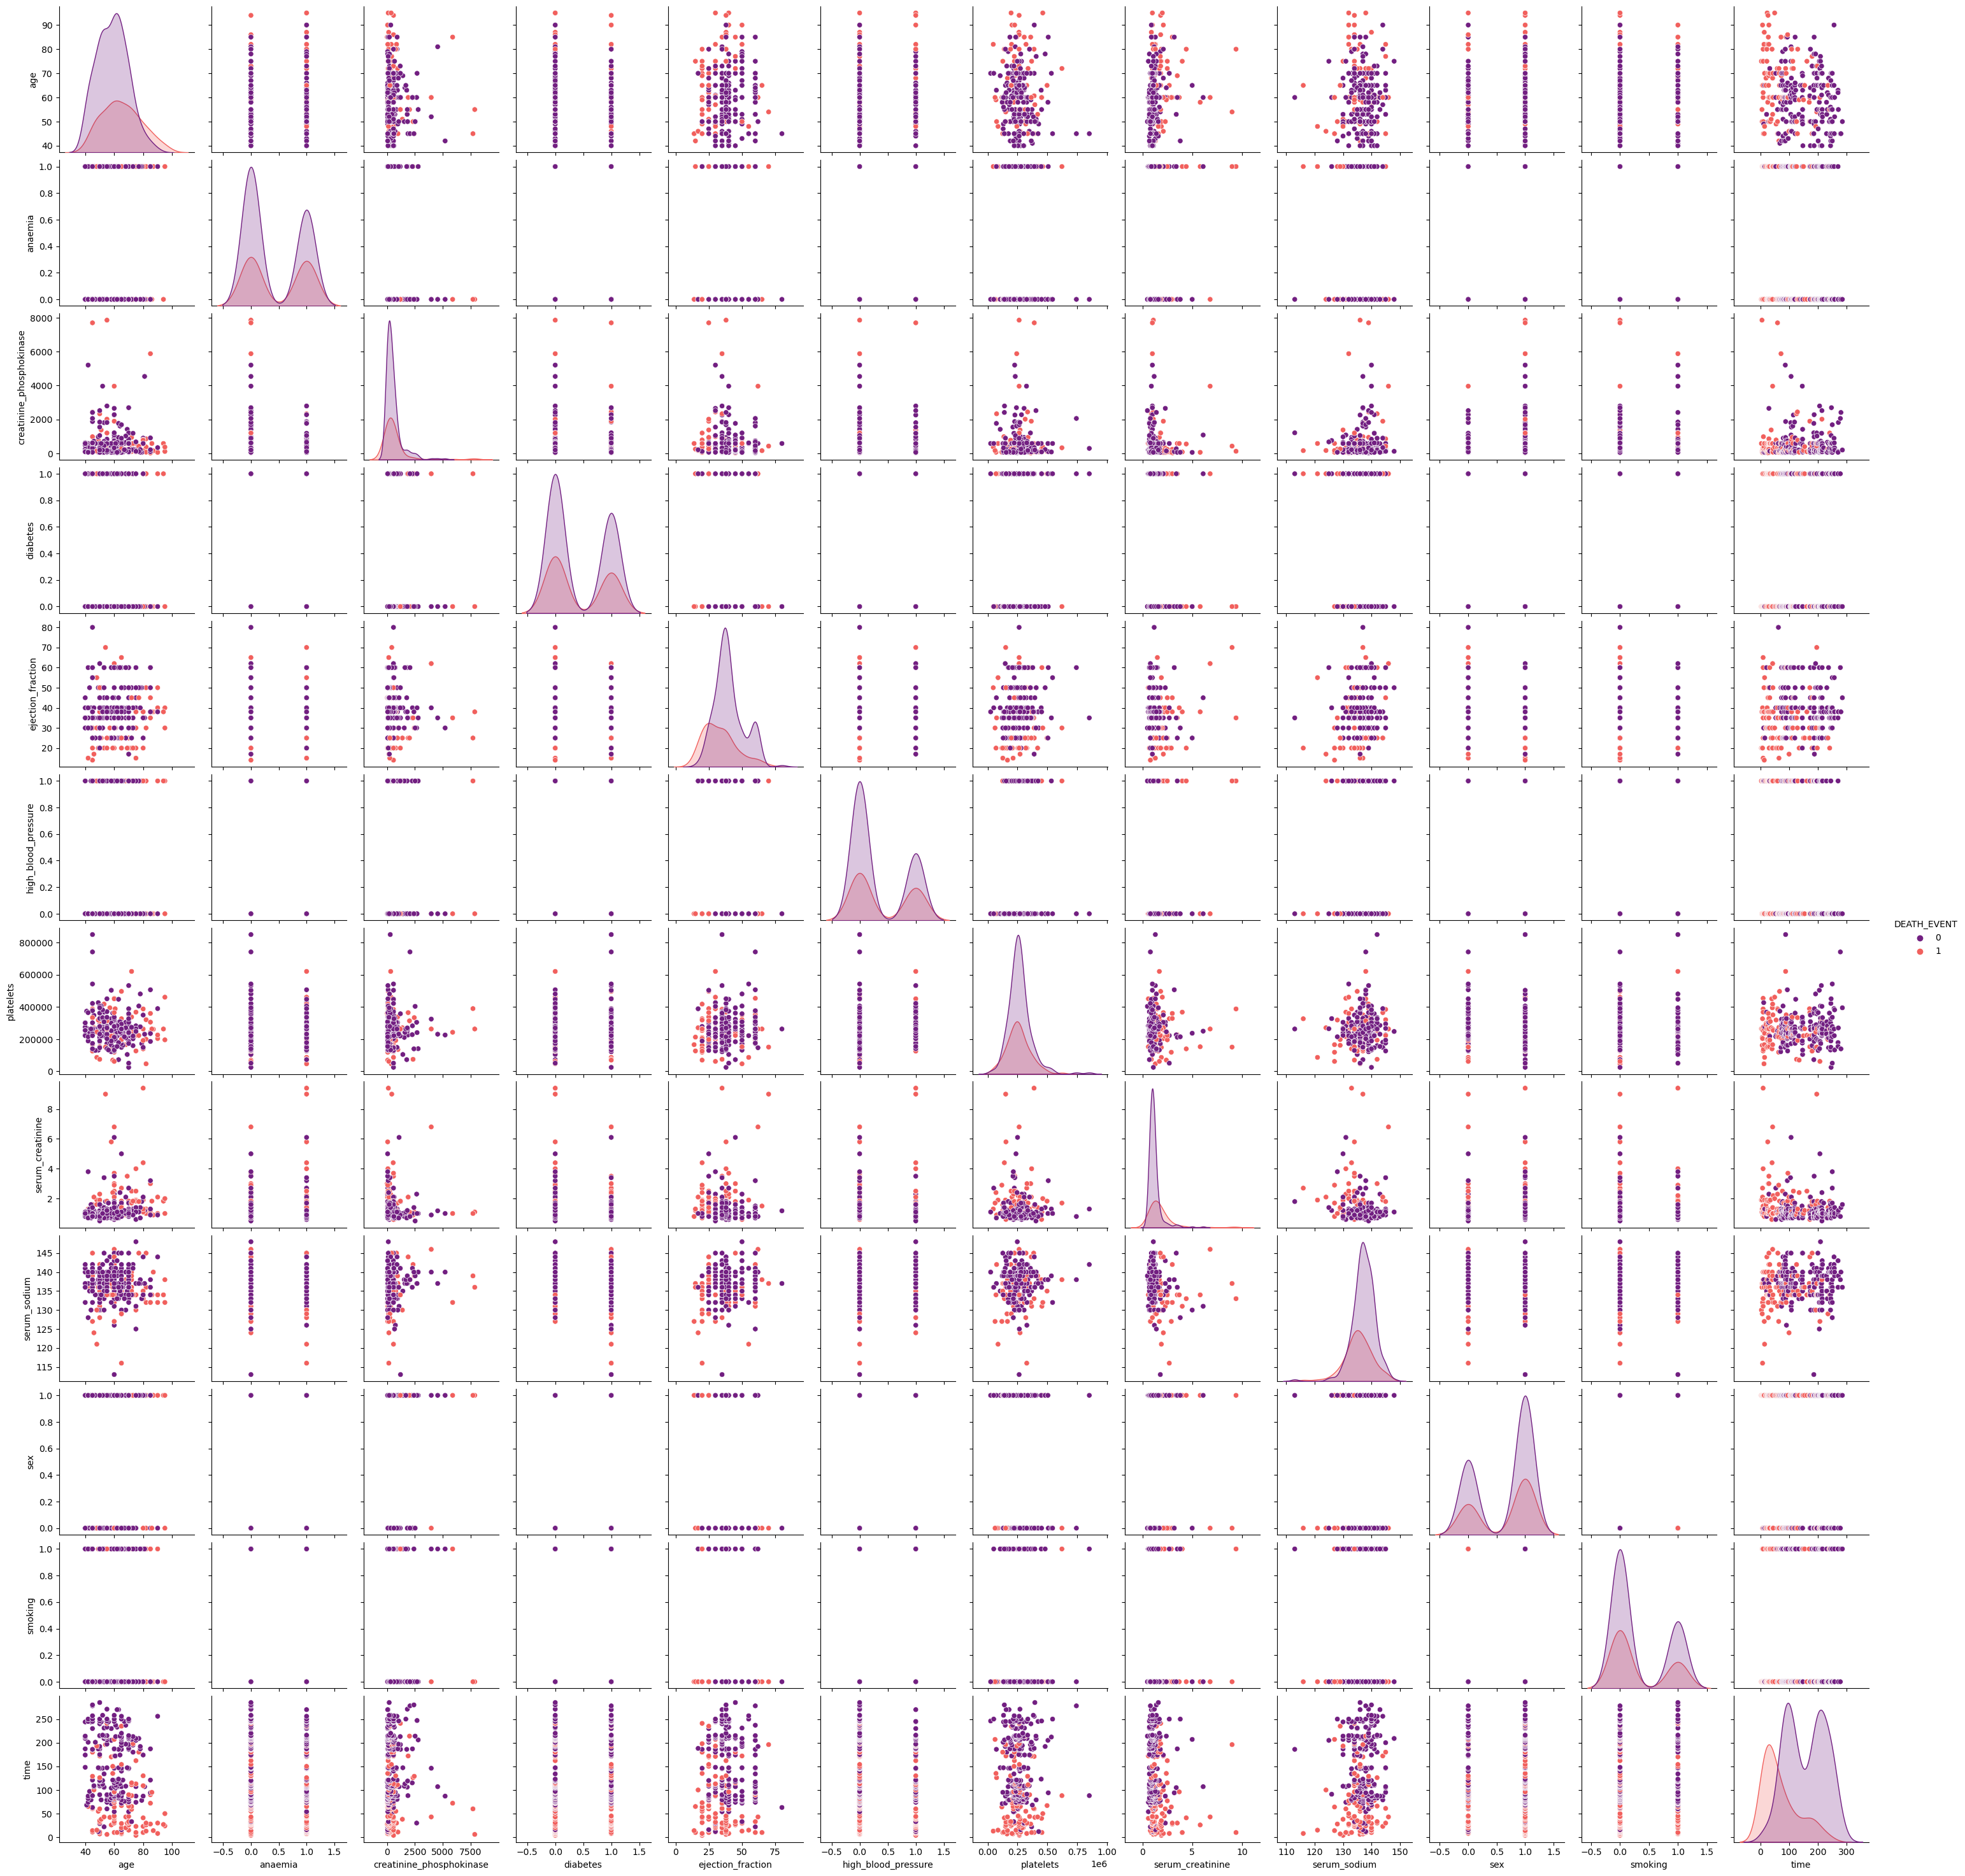

In [79]:
# Display pair plot for data visualization
sns.pairplot(df, hue='DEATH_EVENT', palette="magma")
plt.show()

In [78]:
# Split the data into features and target variable
# features selection
X = df[['age','sex','ejection_fraction', 'anaemia', 'high_blood_pressure', 
        'creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium']]
y = df['DEATH_EVENT']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [81]:
# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [82]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[33  2]
 [19  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.94      0.76        35
           1       0.75      0.24      0.36        25

    accuracy                           0.65        60
   macro avg       0.69      0.59      0.56        60
weighted avg       0.68      0.65      0.59        60



In [86]:
# Training weighted logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, class_weight='balanced', solver='liblinear')
log_reg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', solver='liblinear')

In [87]:
# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[29  6]
 [ 9 16]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79        35
           1       0.73      0.64      0.68        25

    accuracy                           0.75        60
   macro avg       0.75      0.73      0.74        60
weighted avg       0.75      0.75      0.75        60



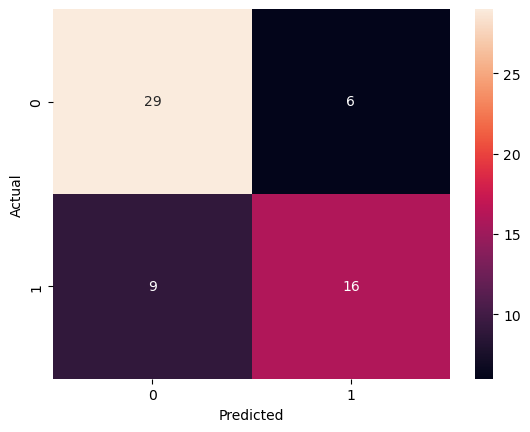

In [88]:
# Visualizing confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

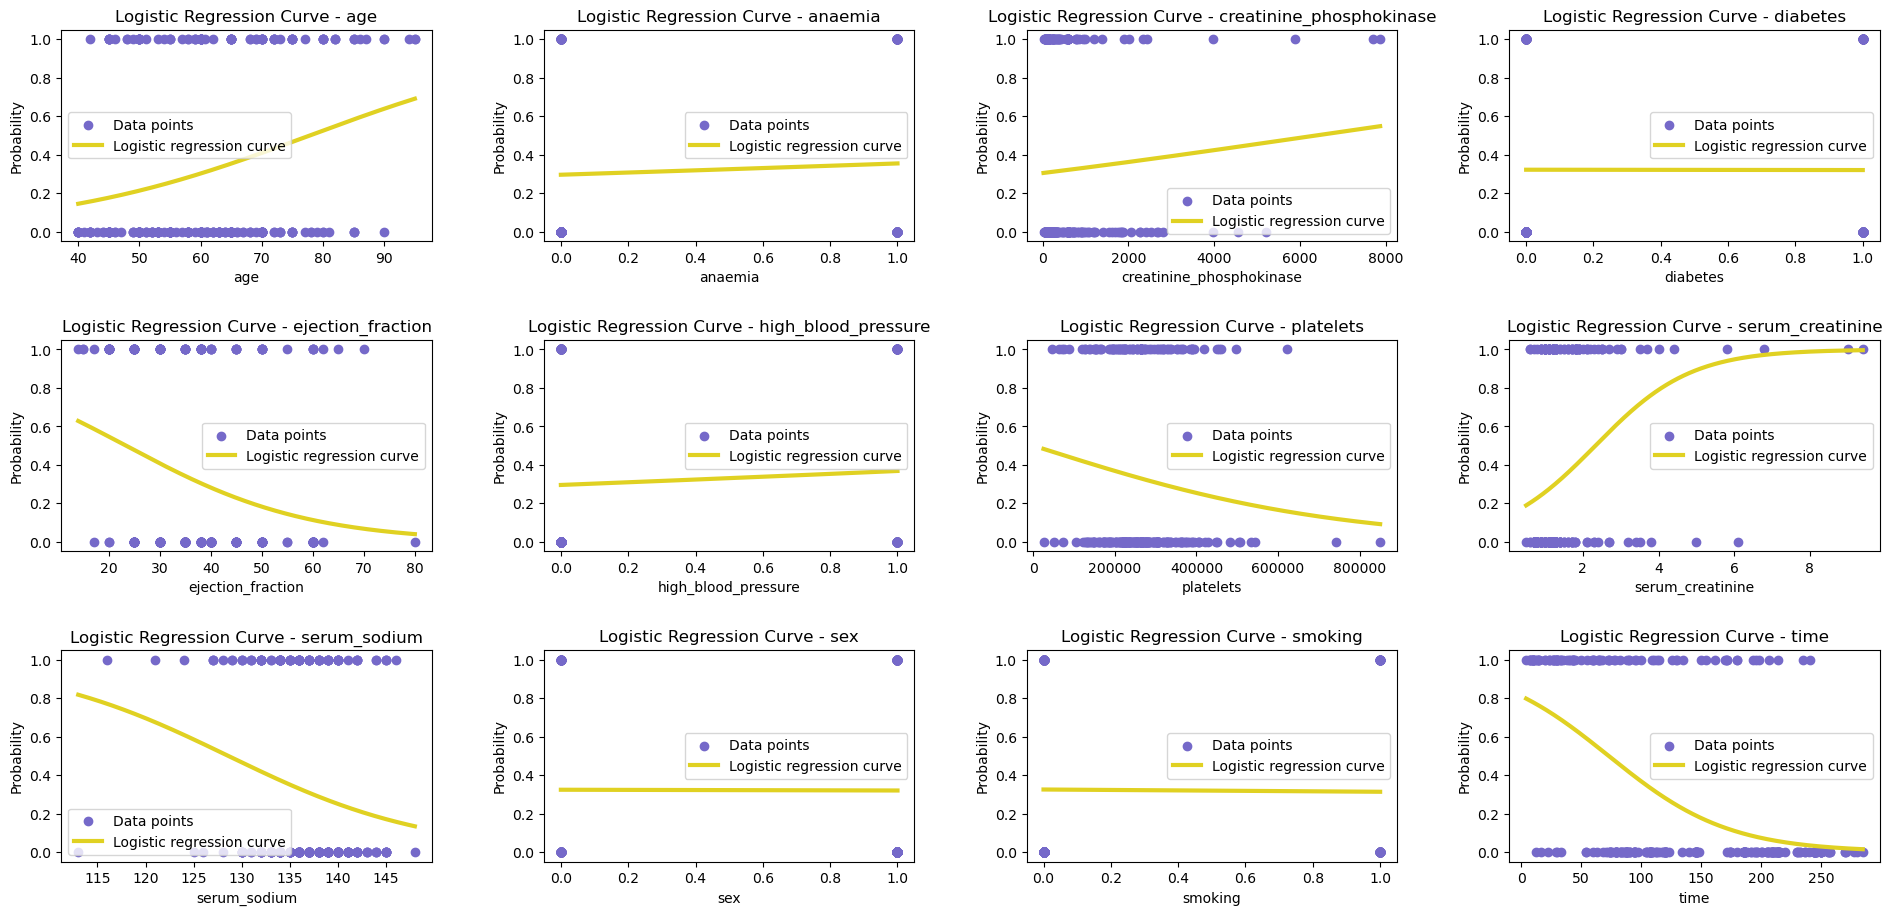

In [89]:
# Create logistic regression object
log_reg = LogisticRegression()

fig, axs = plt.subplots(3, 4, figsize=(20, 10))
fig.tight_layout(pad=5.0)  # Adds padding between subplots

for i, feature in enumerate(df.columns[:-1]):  # Exclude 'Death_event' column
    row = i // 4  # Determine row index
    col = i % 4   # Determine column index

    # Reshape the feature and outcome arrays to fit the model
    X = df[[feature]]
    y = df['DEATH_EVENT']

    # Fit logistic regression model
    log_reg.fit(X, y)

    # Get min and max values of the feature for plotting
    x_test = np.linspace(X.min(), X.max(), 300)

    # Get the probability for each value in the range
    prob = log_reg.predict_proba(x_test)[:, 1]

    # Plot the data points
    axs[row, col].scatter(X, y, color='#7569c9', label='Data points')

    # Plot the sigmoid curve
    axs[row, col].plot(x_test, prob, color='#e0d122', lw=3, label='Logistic regression curve' )

    axs[row, col].set_title(f'Logistic Regression Curve - {feature}')
    axs[row, col].set_xlabel(feature)
    axs[row, col].set_ylabel('Probability')
    axs[row, col].legend()

plt.show()

In [97]:
# Separate features and target variable

X = df.drop('DEATH_EVENT', axis=1)
y = df['DEATH_EVENT']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.367147
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      286
Method:                           MLE   Df Model:                           12
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                  0.4151
Time:                        23:44:39   Log-Likelihood:                -109.78
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 3.771e-27
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       10.1849      5.657      1.801      0.072      -0.902

In [98]:
#only features in our model

# Separate features and target variable
X = df[['age', 'sex', 'ejection_fraction', 'anaemia', 
        'high_blood_pressure', 'creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium']]
y = df['DEATH_EVENT']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

Optimization terminated successfully.
         Current function value: 0.493027
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  299
Model:                          Logit   Df Residuals:                      290
Method:                           MLE   Df Model:                            8
Date:                Mon, 02 Oct 2023   Pseudo R-squ.:                  0.2145
Time:                        23:44:42   Log-Likelihood:                -147.42
converged:                       True   LL-Null:                       -187.67
Covariance Type:            nonrobust   LLR p-value:                 3.844e-14
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        5.2384      4.554      1.150      0.250      -3.687

In [99]:
# Apply KNN

# Split the data into features and target variable
X = df[['age','sex','ejection_fraction', 'anaemia', 'high_blood_pressure', 
        'creatinine_phosphokinase', 'serum_creatinine', 'serum_sodium']]
y = df['DEATH_EVENT']

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

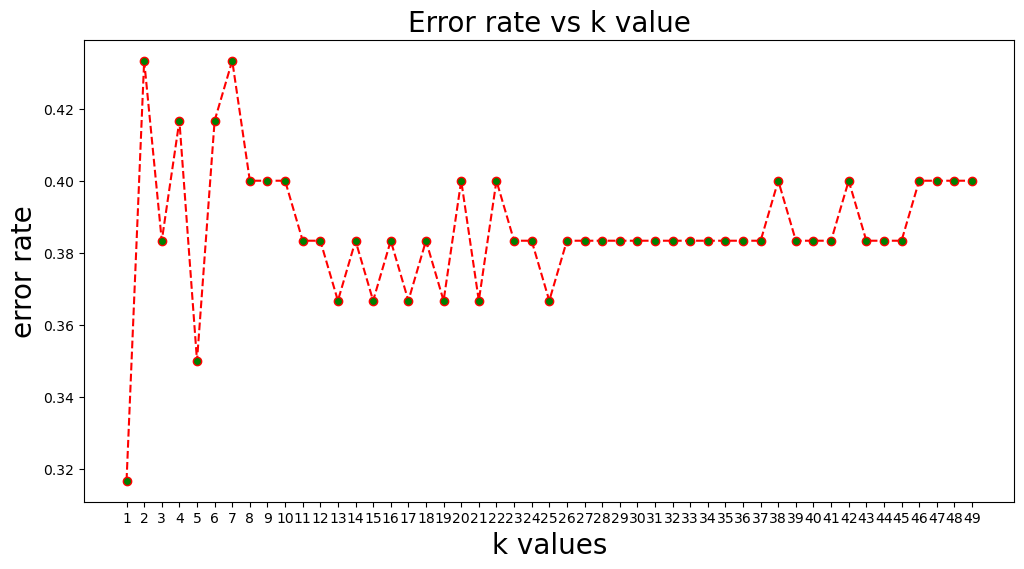

In [100]:
# choose K based on overall accuracy

max_k = 50

error_rate =[] # list that will store the accuracy score value of k
for i in range (1, max_k):  #Took the range of k from 1 to max_k
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred =knn.predict(X_test)
    error_rate.append(1 - accuracy_score(y_test, y_pred))

# Plotting the accuracy vs k graph
plt.figure(figsize=(12,6))
plt.plot(range(1, max_k),error_rate,marker="o",
         markerfacecolor="green",
         linestyle="dashed",color="red")
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1, max_k))
plt.show()

In [101]:
# Apply KNN, the Optimal K was 5 based on the plot

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict using the test data
y_pred = knn.predict(X_test)

# Train accuracy
y_train_pred = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy * 100:.2f}%")

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Train Accuracy: 78.24%
Test Accuracy: 65.00%
[[34  1]
 [20  5]]
              precision    recall  f1-score   support

           0       0.63      0.97      0.76        35
           1       0.83      0.20      0.32        25

    accuracy                           0.65        60
   macro avg       0.73      0.59      0.54        60
weighted avg       0.71      0.65      0.58        60



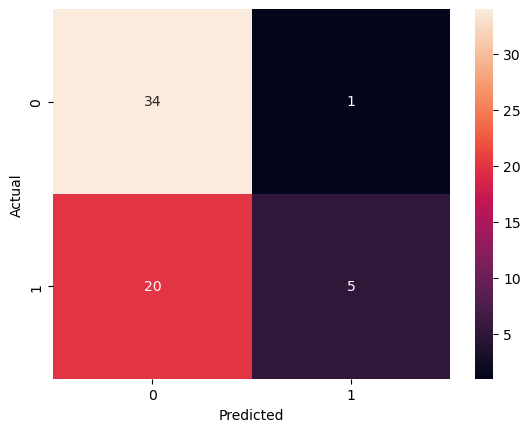

In [102]:
# Visualizing confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()